# **Machine Learning**: Klassifikation

Wir nutzen ein Datenset, das handschriftliche Ziffern in Form von 8x8 Feldern mit Werten der Farbstärkte darstellt. Eine Beschreibung des Datensets gib es bei scikit-learn und im UC Irvine Machine Learning Repository. Dieses Datenset bringt scikit-learn selber mit.

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

Die Daten und Metadaten sind in einem sogenannten Bunch-Objekt organisiert

In [3]:
type(digits)

sklearn.utils._bunch.Bunch

Dieser Bunch hat folgende Attribute.

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

Schauen wir uns mal die Beschreibung an

In [5]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

Die eigentlichen Daten sind in einem numpy-Array abgelegt.

In [6]:
type(digits.data)

numpy.ndarray

Schauen wir uns die Dimension der Matrix an - es handelt sich um eine zweidimentionsale Matrix mit 1797 Zeilen und 64 Spalten. Es sind 1797 Bilder (also weniger als die originalen 5620) und 64 Features (eine lineare Darstellung der 8x8 Felder-Farbintensitätswerte) .

In [7]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [8]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [9]:
digits.data.shape

(1797, 64)

Das Target-Attribute ist ebenfalls ein numpy-array …

In [10]:
type(digits.target)

numpy.ndarray

… allerding mit nur einer Dimension.

In [11]:
digits.target.shape

(1797,)

Jeder Wert entspricht der **geschriebenen** Nummer

In [12]:
digits.target[:29]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8])

Das Bunch-Objekt hat noch das Attribute target_names. Normalerweise wird jeder Zahl in targent hier ein Name zugeordnen. Da es sich aber tatsächlich um Ziffern von 0 - 9 handelt, ist das in diesem nicht nötig.

In [13]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In diesem Datenset gibt es zusätzlich noch ein Attribute images. Es enthält für jede geschrieben Ziffer die Farbwerte in ein 8x8-Matrix.

In [14]:
len(digits.images)

1797

In [15]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [16]:
import matplotlib.pyplot as plt
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

%matplotlib inline

Wir können die in dieser Form gespeicherten Farbintensitäten auch mit matplotlib anzeigen lassen. Hier zum Beispiel für die ersten 30 Bilder (wenn man mehr haben möchte, muss man in subplot mehr als 3 Zeilen angeben).

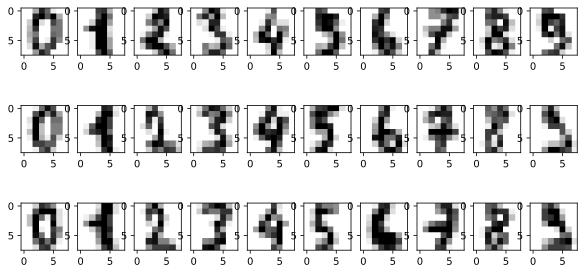

In [17]:
fig, axes = plt.subplots(3, 10, figsize=(10, 5))

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img, cmap=plt.cm.gray_r)

Um einen Klassifikator für ein Klassifikation zu trainieren und dann später seine Güte zu bewerten, wird das Datenset (genauer gesagt die Attribute data und target) in ein Trainingsset (75%) und Testset (25%) aufgeteilt. Die Konvention ist hier eine großes X für den Variablen der Datenmatrix und ein kleines y für den Target-Vektor zu nutzen.

Anmerkung: Bei einigen der folgenden Schritte wird von zufälligen Zuständen ausgegagen. Um diese fest zu setzen und somit die Analyse reproduzierbar zu machen, kann man den Parameter random_state nutzen und mit einer Zahl versehen.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    digits['data'], digits['target'], random_state=1)

Die Maße der zweidimensionalen Trainigs-Daten-Matrix:

In [20]:
X_train.shape

(1347, 64)

Die Maße der zweidimensionalen Test-Daten-Matrix:

In [21]:
X_test.shape

(450, 64)

In [22]:
X_train.shape[0] + X_test.shape[0]

1797

Die Länge des Trainingsvektor entspricht der Anzahl an Zeilen der Trianingsmatrix (= **Klassifikation der Zahl** in `digit.targets`).

In [23]:
y_train.shape

(1347,)

In [24]:
y_test.shape

(450,)

Wir werden zuerst mit einem k-Nearest-Neighbor-Klassifizierer Arbeiten und laden dazu die Klasse …

In [25]:
from sklearn.neighbors import KNeighborsClassifier

… und erzeugen ein Objekt davon. Hierbei können wird die Anzahl an zu betrachteten Nachbarn angeben:

In [26]:
knn_clf = KNeighborsClassifier(n_neighbors=1)

Jetzt trainieren wir den Klassifikator mit den Trainingsdaten. Dafür wird in scikit-learn unabhängig von Klassifikator die Methode fit genutzt.

In [27]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Herzlichen Glückwunsch - wir haben unser aller erstes Klassifikator-Modell gebaut und trainiert. Jetzt kann mit diesem neue Daten (also Vektoren der Länger 64, die die 8x8 Bilder darstellen) klassifizieren - in diesem Fall also um vorauszusagen, welche Ziffer dargestellt wurde.

Wir haben unsere Testdaten noch verfügbar und können die Methode predict des trainierten Klassifiers nutzen und erhalten die Voraussagen.

In [28]:
result = knn_clf.predict(X_test)
result[:30].reshape(3, 10)

array([[1, 5, 0, 7, 1, 0, 6, 1, 5, 4],
       [9, 2, 7, 8, 4, 6, 9, 3, 7, 4],
       [7, 1, 8, 6, 0, 9, 6, 1, 3, 7]])

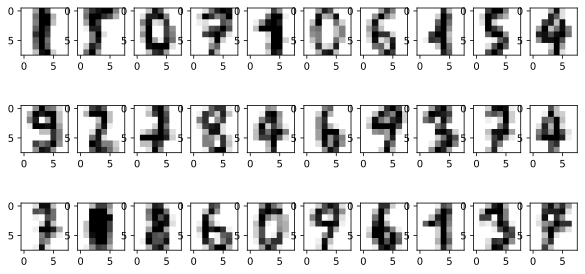

In [29]:
reshaped_array = X_test.reshape(-1, 8, 8)

fig, axes = plt.subplots(3, 10, figsize=(10, 5))

for ax, img in zip(axes.ravel(), reshaped_array):
    ax.imshow(img, cmap=plt.cm.gray_r)

Da wir für das Testset wissen welche Ziffern tatsächlich herauskommen sollte, können wir die Methode score des Klassifiers nutzen. Diese führt die Voraussage durch und vergleicht sie mit den tatsächlichen Target-Werten. Am Ende bekommen wir einen Wert zwischen 0 (schlecht) und 1 (gut).

In [30]:
knn_clf.score(X_test, y_test)

0.9888888888888889

**Aufgabe**: Führen sie das gleich Verfahren mit einen k-Nearest-Neighbor-Klassifizierer selbstständig durch, der 3 Nachbar betrachtet (Code hier nicht angezeigt).

In [31]:
# Initialise KNClassifier
knn_clf3 = KNeighborsClassifier(n_neighbors=3)

# Train on existing training sets
knn_clf3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
# Predict on existing test data
knn_clf3.predict(X_test)

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
       8, 6, 0, 9, 6, 1, 3, 7, 5, 9, 8, 3, 2, 8, 8, 1, 1, 0, 7, 9, 0, 0,
       8, 7, 2, 7, 4, 3, 4, 3, 4, 0, 4, 7, 0, 5, 5, 5, 2, 1, 7, 0, 5, 1,
       8, 3, 3, 4, 0, 3, 7, 4, 3, 4, 2, 9, 7, 3, 2, 5, 3, 4, 1, 5, 5, 2,
       9, 2, 2, 2, 2, 7, 0, 8, 1, 7, 4, 2, 3, 8, 2, 3, 3, 0, 2, 9, 9, 2,
       3, 2, 8, 1, 1, 9, 1, 2, 0, 4, 8, 5, 4, 4, 7, 6, 7, 6, 6, 1, 7, 5,
       6, 3, 8, 3, 7, 1, 8, 5, 3, 4, 7, 8, 5, 0, 6, 0, 6, 3, 7, 6, 5, 6,
       2, 2, 2, 3, 0, 7, 6, 5, 6, 4, 1, 0, 6, 0, 6, 4, 0, 9, 3, 8, 1, 2,
       3, 1, 9, 0, 7, 6, 2, 9, 3, 5, 3, 4, 6, 3, 3, 7, 4, 9, 2, 7, 6, 1,
       6, 8, 4, 0, 3, 1, 0, 9, 9, 9, 0, 1, 8, 6, 8, 0, 9, 5, 9, 8, 2, 3,
       5, 3, 0, 8, 7, 4, 0, 3, 3, 3, 6, 3, 3, 2, 9, 1, 6, 9, 0, 4, 2, 2,
       7, 9, 1, 6, 7, 6, 3, 9, 1, 9, 3, 4, 0, 6, 4, 8, 5, 3, 6, 3, 1, 4,
       0, 4, 4, 8, 7, 9, 1, 5, 2, 7, 0, 9, 0, 4, 4, 0, 1, 0, 6, 4, 2, 8,
       5, 0, 2, 6, 0, 1, 8, 2, 0, 9, 5, 6, 7, 0, 5,

In [33]:
knn_clf3.score(X_test, y_test)

0.9911111111111112

Machen wir nun eine Klassifikation mit einem **Random-Forest-Klassifikator** ganz äquivalent zu der vorherigen Herangehensweise:

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
# Initialse RandomForestClassifier object
random_forest_cfl = RandomForestClassifier(random_state=1)

# Train
random_forest_cfl.fit(X_train, y_train)

# Score 
random_forest_cfl.score(X_test, y_test)

0.98

Das gleiche machen wir nun für eine Klassifikation mit einem **künstlichen, neuralen Netz (Multi-Layer-Perceptron)**. Standardmäßig hat das Netz ein eine Hidden-Layer mit 100 Nodes.

In [36]:
from sklearn.neural_network import MLPClassifier

In [37]:
# Initialse Multi-Layer Perceptron Classifier object
mlpc = MLPClassifier(random_state=1)

# Train
mlpc.fit(X_train, y_train)

# Score
mlpc.score(X_test, y_test)

0.9755555555555555

Wir können die Anzahl an Hidden-Layer und Anzahl an Nodes in diesen als Parameter setzen (hier 3 Schichten mit mit 200, 100 und 20 Nodes). Man kann die Schritte kondenensiert schreiben, indem man die Methodenaufrufe direkt verknüpft.

In [38]:
MLPClassifier(random_state=1,
              hidden_layer_sizes=(200, 100, 20)).fit(
                  X_train,
                  y_train).score(
                      X_test,
                      y_test)

0.9844444444444445

Es gibt noch viele weitere Klassifikatoren in scikit-learn. Für einen Einführung sollten dies 3 Bespiele aber reichen. Wir konnten hier aber sehen, wie einfach sklearn es uns auf Grund der kosistenten Methoden macht, verschiedene Klassifikationsmethode zu nutzen.